In [14]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import scipy.linalg as la
from sklearn.decomposition import PCA

In [15]:
D = pickle.load(open('MNISTsmall.p', 'rb'))
X = D['data']*1.
y = D['target']
folds = D['foldTrain']
D.keys()

dict_keys(['data', 'target', 'DESCR', 'target_names', 'foldTrain'])

## Pergunta 1

### a) -> iv

In [16]:
X2 = X[:,~folds]
y2 = y[~folds]

X_4 = X2[:, y2 == 4][:, :367]

In [17]:
x1 = X_4[:, 21]
x2 = X_4[:, 220]
x3 = X_4[:, 281]
x4 = X_4[:, 320]

print(np.dot(x1, x2))
print(np.dot(x3, x4))

1023315.0
4199622.0


### b) -> i

In [18]:
np.sum(np.diag(np.cov(X_4)) == 0)

np.int64(273)

In [19]:
S = np.corrcoef(X_4)
print(S[435,482])

-0.0968362063155534


c:\Users\tomas\miniconda3\envs\AA\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\tomas\miniconda3\envs\AA\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


### c) -> iii

In [20]:
pca = PCA(n_components=.95).fit(X_4.T)
pca.n_components_

np.int64(93)

### d) -> i

In [21]:
cov = np.cov(X_4)
print(cov.shape)
print(la.det(cov))

(784, 784)
0.0


### e) -> iv

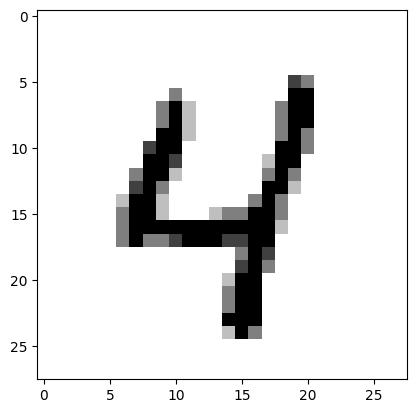

In [22]:
u, V = la.eig(cov)
V = V.real

plt.imshow(X_4[:, 264].reshape(28,28), cmap='binary')

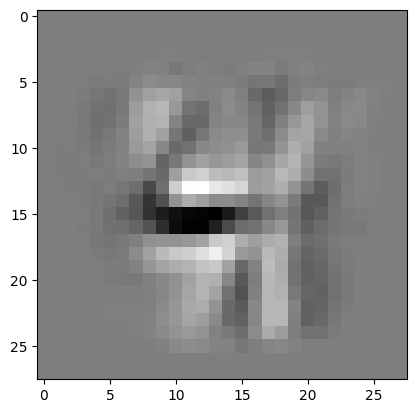

In [23]:
plt.imshow(V[:, 8].reshape(28,28), cmap='binary')

### f) -> i

In [24]:
m = np.mean(X_4, axis=1)
np.round(np.sqrt(np.sum(m**2)))

np.float64(1560.0)

In [25]:
np.std(X_4[333, :])

np.float64(6.046895559908018)

## Save file

In [26]:
QD = pickle.load(open('A48286_Ficha3_Respostas.p', 'rb'))
# Pergunta 1
QD['Q001'][0,:] = np.array([0,0,0,1]) # 4
QD['Q001'][1,:] = np.array([1,0,0,0]) # 1
QD['Q001'][2,:] = np.array([0,0,1,0]) # 3
QD['Q001'][3,:] = np.array([1,0,0,0]) # 1
QD['Q001'][4,:] = np.array([0,0,0,1]) # 4
QD['Q001'][5,:] = np.array([1,0,0,0]) # 1

# Save
pickle.dump(QD, open('A48286_Ficha3_Respostas.p', 'wb'))

# Show data
pickle.load(open('A48286_Ficha3_Respostas.p', 'rb'))

{'Q001': array([[0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.]]),
 'nome': 'Tomas Miguel Baptista de Matos',
 'numero': 'A48286'}